In [1]:
using GLMakie, NativeFileDialog, FileIO, IndirectArrays, ImageSegmentation, Images, ImageEdgeDetection

GLMakie.set_window_config!(title = "Grain Analyzer")

function grain_analyzer_window()
    f = Figure(resolution = (900,900),fontsize = 18.5, buttoncolor = RGBf(0.21, 0.21, 0.21))
    labels = ["Open","Analyze","Clear","Export to CSV"]
    widths = [80,80,80,150]
    buttons = [Button(f[1,i],label=labels[i],width=widths[i],height=40,labelcolor=:black) for i = 1:4]
    tb = Textbox(f[1, 5], placeholder = "Pixel to length scale",validator = Float64, tellwidth = false)
    #img = Array{GLMakie.ColorTypes.RGB{GLMakie.FixedPointNumbers.Normed{UInt8, 8}}}(undef,2000,2000)
    #img .= GLMakie.Makie.ColorTypes.RGB(0.1,0.1,0.1)

    choose_title(x) = x ?  "Grain View" : "Image View"
    load_image(x) = load(x)

    scale = Observable(1.0)
    show_grain_view = Observable(false)
    loc = Observable("./assets/images/Background.jpg")

    on(buttons[1].clicks) do c
        show_grain_view[] = false
        lc = pick_file(filterlist="*.tiff;*.png;*.jpeg;*.jpg;*.bmp")
        length(lc) > 0 ? loc[] = lc : ~
    end

    on(buttons[2].clicks) do c
        show_grain_view[] = true
    end

    on(buttons[3].clicks) do c
        loc[] = "./assets/images/Background.jpg"
    end

    on(tb.stored_string) do s
        scale[] = parse(Float64, s)
    end

    title_string = lift(choose_title,show_grain_view)
    img = lift(load_image,loc)
    ax, im = image(f[2:4, 1:6], img, axis = (aspect = DataAspect(), yreversed = true, title = title_string))
    hidedecorations!(ax)
    return f
    #display(f)
end

function grain_analyzer()
    with_theme(grain_analyzer_window,theme_dark())
end

grain_analyzer (generic function with 1 method)

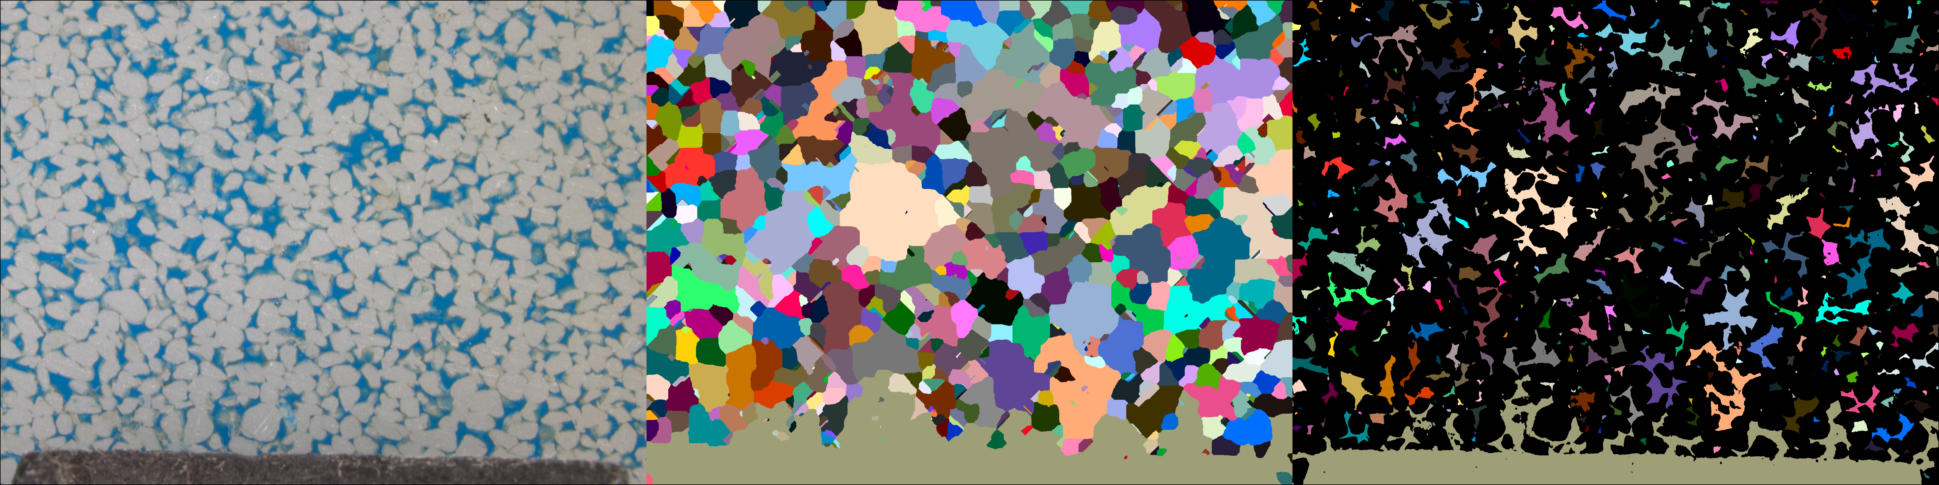

In [8]:
loc = "./assets/images/s817 11558.8.tiff"
threshold = 0.5
img = load(loc)

bw = Gray.(img) .> threshold
bw_transform = feature_transform(bw)
dist = 1 .- distance_transform(bw_transform)
dist_trans = dist .< 1
markers = label_components(dist_trans)
Gray.(markers/32.0)
segments = watershed(dist, markers)
labels = labels_map(segments)
colored_labels = IndirectArray(labels, distinguishable_colors(maximum(labels)))
masked_colored_labels = colored_labels .* (1 .- bw)
mosaic(img, colored_labels, masked_colored_labels; nrow=1)

In [3]:
typeof(colored_labels)

IndirectArray{RGB{N0f8}, 2, Int64, Matrix{Int64}, Vector{RGB{N0f8}}}

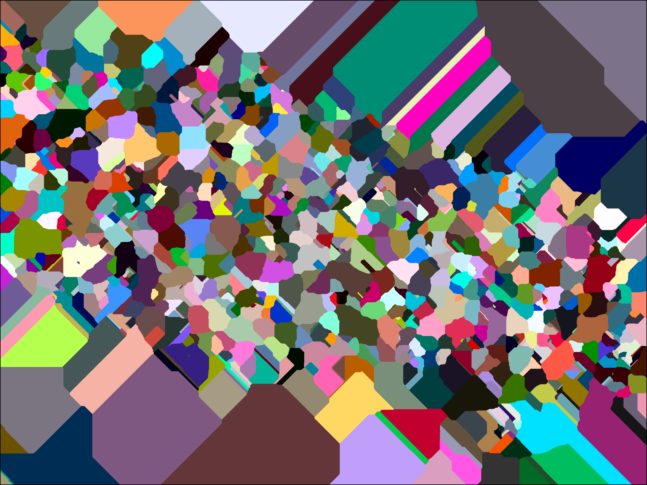

In [4]:
colored_labels